# Group 41 STAT-301 Project Proposal: Predicting Metacritic Score of Steam Games
### Introduction

Steam is the largest digital distribution platform for computer games. The platform can be seen as a digital community market. It allows its users to purchase games, adding them to a virtual library from which they may be downloaded and installed an unlimited number of times. Metacritic scores rate the overall performance of video games ranging from 0-100, with higher scores indicating more positive reviews, and lower scores indicating less favorable reviews from critics. These scores are helpful since there are thousands of different types of video games published on Steam and consumers may find it difficult to make decisions. There is also research showing that Metacritic scores at least partially explain player experience (Johnson et al., 2014). Therefore, a game's Metacritic score may help consumers make a decision about their game purchasing. And since Metacritic scores have a strong correlation with game sales (Greenwood-Ericksen et al., 2013), understanding and predicting them is important for sellers as well.

 In our project, we will predict the Metacritic score of Steam games (the response variable) released after the year 1970, based on input variables such as the price, the number of recommendations, and release date of a game. The project will be focused on both prediction and inference. Although our main goal is to predict the game's Metacritic Score, it will be also interesting to find out the different relationships between a game's Metacritic score and its input variables (i.e. which variables explain the variation in Metacritic score the best). 
 
 
 The dataset we used is collected and released under the Steam API (Steam Games, 2022). It has the following 19 variables:
- 'ResponseName'
- 'ReleaseDate'
- 'Metacritic'
- 'RecommendationCount'
- 'IsFree'
- 'GenreIsNonGame'
- 'GenreIsIndie'
- 'GenreIsAction'
- 'GenreIsAdventure'
- 'GenreIsCasual'
- 'GenreIsStrategy'
- 'GenreIsRPG'
- 'GenreIsSimulation'
- 'GenreIsEarlyAccess'
- 'GenreIsFreeToPlay'
- 'GenreIsSports'
- 'GenreIsRacing'
- 'GenreIsMassivelyMultiplayer'
- 'PriceInitial'

The variable `ResponseName` will not be used as it is a unique value representing the name of a game. The continuous input variables in this dataset are `ReleaseDate` (representing the number of days passed since January 1st, 1970), `PriceInitial` (the price of a video game), and `RecommendationCount` (the number of recommendations of a game on Steam). The other variables are logicals (i.e. TRUE  or FALSE) that say whether or not a game fits into a certain genre or category. 


### Preliminary Results
In this section, we will demonstrate that we can read the data from the web and wrangle it into a tidy format. We will also address our primary question with plots and tables.
#### Reading the Data

In [15]:
# load libraries + set options
library(tidyverse)
library(broom)

options(jupyter.plot_mimetypes = "image/png")

In [16]:
#read_csv on a url, which responds with the data
steam_games <- read_csv('https://raw.githubusercontent.com/DanielZCode/STAT-301-Project/main/games-features-edit.csv')
                                                                                           
head(steam_games) # preview of the data 
nrow(steam_games) # 12624 data points (games)
colnames(steam_games) #variable names, number of variables == 19
#length(colnames(steam_games)) #prints out number of variables


Rows: 12624 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ResponseName, ReleaseDate
dbl  (3): Metacritic, RecommendationCount, PriceInitial
lgl (14): IsFree, GenreIsNonGame, GenreIsIndie, GenreIsAction, GenreIsAdvent...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial
<chr>,<chr>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>
Counter-Strike,Nov 1 2000,88,68991,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,9.99
Team Fortress Classic,Apr 1 1999,0,2439,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,4.99
Day of Defeat,May 1 2003,79,2319,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,4.99
Deathmatch Classic,Jun 1 2001,0,888,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,4.99
Half-Life: Opposing Force,Nov 1 1999,0,2934,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,4.99
Ricochet,Nov 1 2000,0,1965,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,4.99


[1] 12624

[1] "ResponseName"                "ReleaseDate"                
 [3] "Metacritic"                  "RecommendationCount"        
 [5] "IsFree"                      "GenreIsNonGame"             
 [7] "GenreIsIndie"                "GenreIsAction"              
 [9] "GenreIsAdventure"            "GenreIsCasual"              
[11] "GenreIsStrategy"             "GenreIsRPG"                 
[13] "GenreIsSimulation"           "GenreIsEarlyAccess"         
[15] "GenreIsFreeToPlay"           "GenreIsSports"              
[17] "GenreIsRacing"               "GenreIsMassivelyMultiplayer"
[19] "PriceInitial"

#### Data Wrangling 
In order to correctly use the `ReleaseDate` variable, we will need to convert it from its current character-based format to a numerical value. Although it would be convenient to convert this variable year that the game was released, that would not be a true continuous variable since years are mostly discrete (especially in the case of Steam games, where the data available is fairly recent). Hence, we will need to convert `ReleaseDate` to a continuous variable representing the number of days passed since January 1st, 1970. This is a common representation of time in computers. 

In addition, we will filter the data for missing values, and also check that a game's `Metacritic` score is not 0, because that indicates a lack of reviews and an unplayed game. We will also filter only for games that were released after 1970.


In [17]:
set.seed(3012)

#convert dates to days since 1970 (default internal representation) 
steam_games$ReleaseDate <- steam_games$ReleaseDate %>% as.Date(format="%b%d%Y") %>%  as.numeric() 


steam_games <- steam_games %>% drop_na() %>% filter(Metacritic > 0, ReleaseDate > 0) # filter for more than 0 days passed since 1970, metacritic score > 0

steam_games <- steam_games %>% mutate_if(is.logical, as_factor)
head(steam_games)
nrow(steam_games) ## number of steam games, filtered


ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial
<chr>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
Counter-Strike,11262,88,68991,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,9.99
Day of Defeat,12173,79,2319,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,4.99
Half-Life,10538,96,12486,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,9.99
Counter-Strike: Condition Zero,12478,65,7067,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,9.99
Counter-Strike: Condition Zero,12478,65,7067,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,9.99
Half-Life: Blue Shift,11474,71,2219,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,4.99


[1] 2241

After wrangling the data in this way, we are left with 2241 observations, down from the original 12624 observations. However, this is still too large. The plots are slow to run with this many data points. Therefore, we will need to artifically take a lower sample of a dataset, using `sample_n`. We've chosen to work with a sample of 500. 

In this sample, it turns out that the GenreIsNonGame variable is always false, and the GenreIsEarlyAccess variable is always false. Because these variables have no variation, we will be removing them.

In [18]:
set.seed(3012)
steam_games <- steam_games %>% sample_n(500)

length(unique(steam_games$GenreIsNonGame)) # == 1, hence no variation in GenreIsNonGame
length(unique(steam_games$GenreIsEarlyAccess)) # == 1, hence no variation in GenreIsEarlyAccess

steam_games <- steam_games %>% select(-GenreIsNonGame, -GenreIsEarlyAccess)

head(steam_games)
nrow(steam_games)


[1] 1

[1] 1

ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial
<chr>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
Death to Spies,13950,69,450,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,4.99
Kane & Lynch 2: Dog Days,14838,66,2723,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,9.99
Driver San Francisco,15244,80,2186,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,19.99
Five Nights at Freddys,16301,78,16575,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,4.99
Atom Zombie Smasher,15047,75,1337,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,9.99
DUNGEONS - Steam Special Edition,15015,65,339,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,9.99


[1] 500

#### Exploratory Analysis
In this section we will explore some estimates variables. In addition we will plot visualizations of our reponse variable, `Metacritic`, and its relation to other variables.

First, let us see the distribution of `Metacritic` scores.

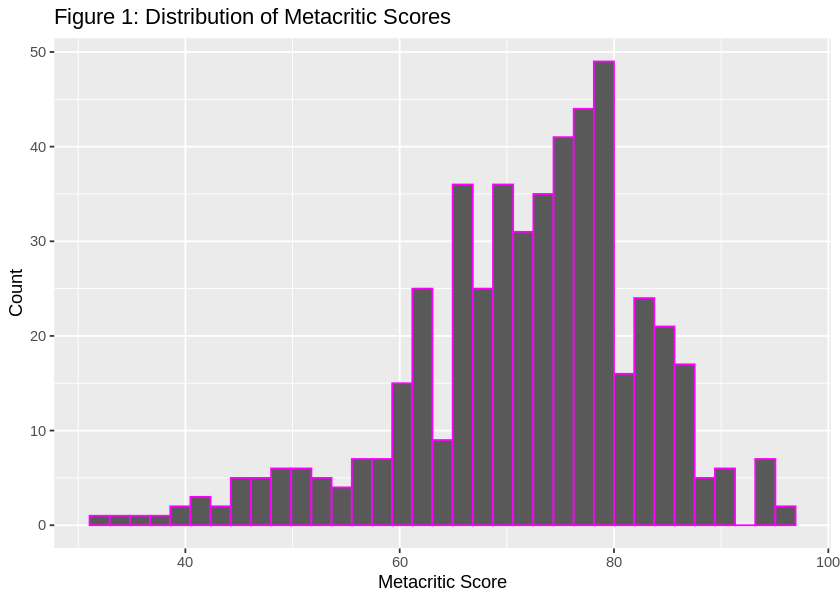

In [19]:
options(repr.plot.width = 7, repr.plot.height = 5)

steam_games_metacritic_dist <- steam_games %>% ggplot() +
    geom_histogram(aes(x = Metacritic), bins = 35, color = '#FF00FF') +
    ggtitle('Figure 1: Distribution of Metacritic Scores') +
    labs(x = 'Metacritic Score', y = 'Count')

steam_games_metacritic_dist
    

Next, let us plot the relationship of Metacritic Score with the other continous variables.

`geom_smooth()` using formula 'y ~ x'



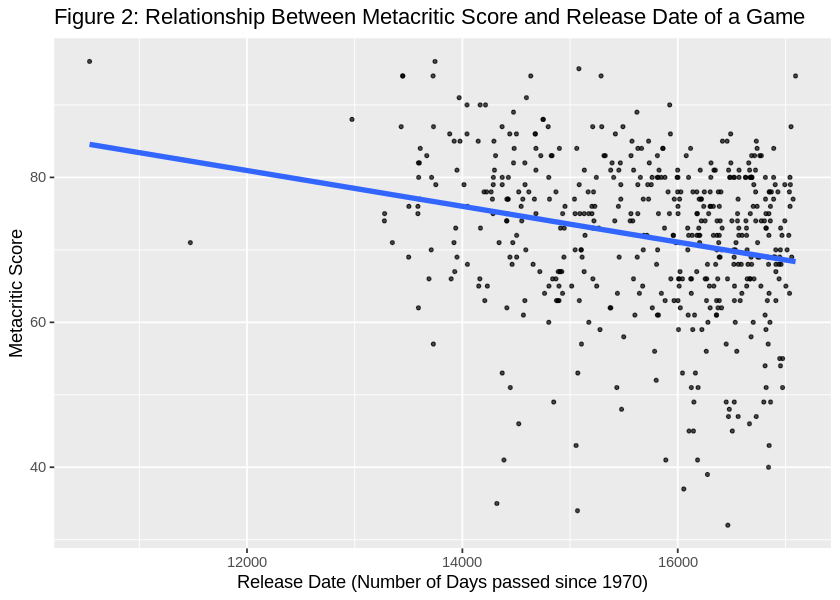

In [20]:
steam_games_metacritic_releasedate_plot <- steam_games %>% ggplot() +
    geom_point(aes(x = ReleaseDate, y = Metacritic), size = 0.8, alpha = 0.7) +
    geom_smooth(aes(x = ReleaseDate, y = Metacritic), method = lm, se = FALSE, size = 1.5) +
    ggtitle('Figure 2: Relationship Between Metacritic Score and Release Date of a Game') +
    labs(y = 'Metacritic Score', x = 'Release Date (Number of Days passed since 1970)')
steam_games_metacritic_releasedate_plot

`geom_smooth()` using formula 'y ~ x'



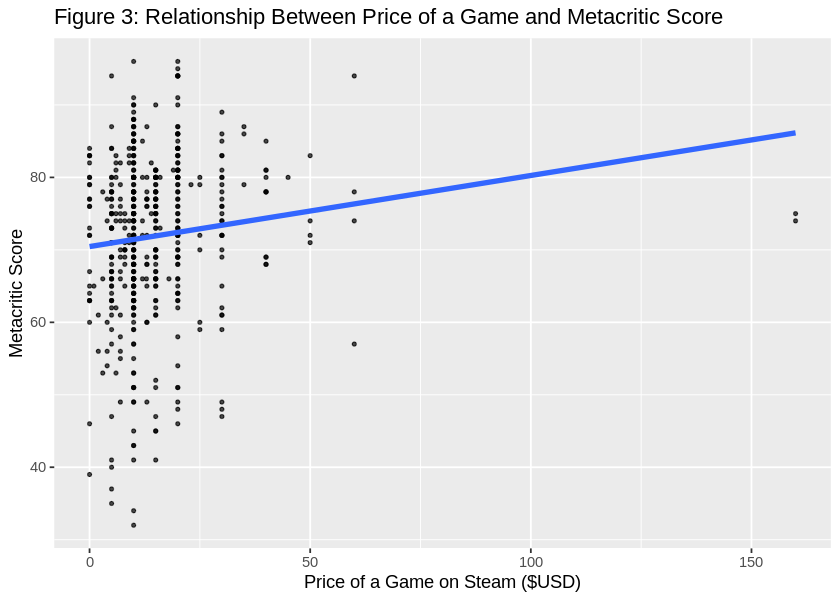

In [21]:
steam_games_metacritic_price_plot <- steam_games %>% ggplot() +
    geom_point(aes(x = PriceInitial, y = Metacritic),  size = 0.8, alpha = 0.7) +
    geom_smooth(aes(x = PriceInitial, y = Metacritic), method = lm, se = FALSE, size = 1.5) +
    ggtitle('Figure 3: Relationship Between Price of a Game and Metacritic Score') +
    labs(y = 'Metacritic Score', x = 'Price of a Game on Steam ($USD)')
steam_games_metacritic_price_plot

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 32 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 32 rows containing missing values (geom_point).”


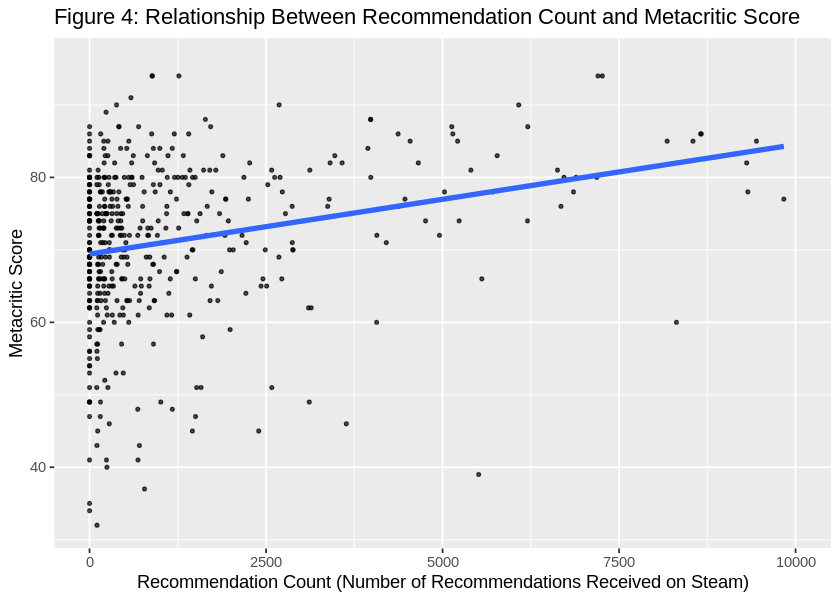

In [22]:
steam_games_metacritic_recommendation_plot <- steam_games %>% ggplot() +
    geom_point(aes(x = RecommendationCount, y = Metacritic),  size = 0.8, alpha = 0.7) +
    geom_smooth(aes(x = RecommendationCount, y = Metacritic), method = lm, se = FALSE, size = 1.5) +
    scale_x_continuous(limits = c(0, 10000)) +
    ggtitle('Figure 4: Relationship Between Recommendation Count and Metacritic Score') +
    labs(y = 'Metacritic Score', x = 'Recommendation Count (Number of Recommendations Received on Steam)')
steam_games_metacritic_recommendation_plot

**Note:** About 30 data points were removed for **Figure 4** for increased clarity.


#### Estimates
Below we will compute some estimates of the data.


In [23]:
steam_games_summarized <- steam_games %>% summarize(ReleaseDate_mean = mean(ReleaseDate), 
                                                    ReleaseDate_mean_Date = format(as.Date(ReleaseDate_mean, origin ='1970-01-01'), '%B %d, %Y'),
                                                    Metacritic_mean = mean(Metacritic), 
                                                    RecommendationCount_mean = mean(RecommendationCount),
                                                    PriceInitial_mean = mean(PriceInitial))
steam_games_summarized

ReleaseDate_mean,ReleaseDate_mean_Date,Metacritic_mean,RecommendationCount_mean,PriceInitial_mean
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
15669.64,"November 25, 2012",71.888,2938.9,14.60432


**Figure 5. Averages of different variables**

As we can see, the average Metacritic score of a Steam game is approximately **72**, and the average release date was in **November, 2012**. In addition, Steam games have received around **3000** recommendations on average, and have a mean price of approximately **$14.5**.


#### Preliminary Model
Finally, let's compute an additive linear regression model using all of the variables. This will help us understand which variables are statistically significant, and which variables are not.

In [24]:


steam_games_mlr_add <- lm(Metacritic ~ . - ResponseName, data = steam_games)

steam_games_mlr_add_tidy <- tidy(steam_games_mlr_add, conf.level = 0.9, conf.int = TRUE) %>% mutate_if(is.numeric, round, 2)
steam_games_mlr_add_tidy







term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),112.39,7.86,14.30,0.00,99.43,125.34
ReleaseDate,0.00,0.00,-4.91,0.00,0.00,0.00
RecommendationCount,0.00,0.00,4.93,0.00,0.00,0.00
IsFreeTRUE,-0.93,3.74,-0.25,0.80,-7.09,5.23
GenreIsIndieTRUE,0.77,1.06,0.72,0.47,-0.98,2.53
GenreIsActionTRUE,-3.03,1.07,-2.82,0.00,-4.79,-1.26
GenreIsAdventureTRUE,-0.88,1.13,-0.78,0.43,-2.74,0.98
GenreIsCasualTRUE,-2.33,1.71,-1.37,0.17,-5.15,0.48
GenreIsStrategyTRUE,-0.64,1.29,-0.49,0.62,-2.77,1.50


**Figure 6. Estimated Coefficients of an Additive Multiple Linear Regression Model**

### Methods

This report uses a dataset with huge sample of 12624 games and 19 variables. Once filtered to remove observations with missing values, the sample size became more reasonable. But given the technical constraints (file size, plot load time), we chose to reduce the sample further, to a size of 500. 

Wrangling was done to make variables easier to use in our model. The `ReleaseDate` variable was converted from a character format to a continuous variable. All of the logical variables representing a game's genre or category were converted to a factor so that our models could use them. 

The report uses scatterplots and tables to visualize and summarize the data and the relationships between variables. It also fits an additive multiple linear regression model using all of the variables in the dataset. However, more must be done in the final report. In particular, we will need to employ model selection techniques to answer our inferential questions and figure out which variables are relevant. To answer our predictive questions we will also need to evaluate our models using metrics such the **MSE** (Mean Squared Error). 


If we are able to successfully create a predictive model for Metacritic scores, consumers could use this model to easily make a decision about their gaming purchase based on some input variables. Additionally, statistical analysis of this dataset will allow us to understand the relationship between Metacritic scores and other properties of a game. 



### References


Greenwood-Ericksen, A., Poorman, S. R., &amp; Papp, R. (2013). On the validity of Metacritic in assessing game value. *Eludamos: Journal for Computer Game Culture, 7*(1), 101–127. https://doi.org/10.7557/23.6150 

Johnson, D., Watling, C., Gardner, J., &amp; Nacke, L. E. (2014). The edge of glory: the relationship between metacritic scores and player experience. *Proceedings of the First ACM SIGCHI Annual Symposium on Computer-Human Interaction in Play*. https://doi.org/10.1145/2658537.2658694 

*Steam games*. Kaggle. (2022, October 21). Retrieved November 9, 2022, from https://www.kaggle.com/datasets/thedevastator/get-your-game-on-metacritic-recommendations-and 

